# Обработка результатов

In [1]:
import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
k = ['Orig', 0, 5]+ [10*i for i in range(1, 27)] + [263]
k_plot = [0, 0, 5]+ [10*i for i in range(1, 27)] + [263]
n = [0, 1, 2, 3, 4]

In [3]:
def get_graph(roc_tmp, title, columns):
    assert(len(columns) == len(roc_tmp))
    plt.figure(figsize=(18, 7))
    plt.plot(columns[1:], roc_tmp[1:], 'ro')
    plt.plot(columns[:1], roc_tmp[:1], 'bo')
    plt.xlabel('k')
    plt.ylabel('roc auc mean')
    plt.title(title)

In [19]:
def get_boxplot(roc_list, title , columns, figsize = (18, 7)):
    tmp = np.hstack(roc_list)
    tmp = tmp.T
    assert(len(columns) == tmp.shape[1])
    dt = pd.DataFrame(tmp, columns=columns)
    color = dict(boxes='DarkGreen', whiskers='DarkOrange',
              medians='DarkBlue', caps='Gray')
    dt.plot.box(color=color, sym='r+',title=title, figsize=figsize)
    plt.xlabel('k')
    plt.ylabel('roc auc mean')

In [16]:
def get_roc_results(folder):
    roc_list = []
    for result_file in os.listdir(folder):
        result = pd.read_csv(folder + '/' + result_file)
        roc_list.append(result.as_matrix(["grid_roc_auc_mean"]))
    return roc_list

In [17]:
def Go_box(folder, title): get_boxplot(get_roc_results(folder), title, k)

In [18]:
def Go_plot(path, title):
    
    result = pd.read_csv(path).as_matrix(["grid_roc_auc_mean"])
    result = result.reshape(result.shape[0], )
    get_graph(result, title, k_plot)

In [24]:
def Go_two_box(folder, title_1, title_2):
    get_boxplot(get_roc_results(folder),
                title_1 + '                 ' + title_2,
                ['Orig', 'low230', 'low240', 'Orig', 'low250', 'low260'],
               figsize = (8,6))    

# Построим Графики

**k** - исследумый параметр. Сколько данных можно выкинуть, уменьшая тем самым размерность. Т.е. после применения алгоритма, матрица (N, N) станет матрице (N, N - k)

## Logistc regresion

### Orig-Spectral

Выберем однну модель (логичстическую регрессию с фиксированными параметрами). И посмотрим, как меняется результат в зависимости от параметра k
![title](Pic/Plot-Orig-OneModel.png)

Построим boxplot для тогоже классификатора на 10 различных валидаций
![title](Pic/Boxplot-Orig-OneModel.png)

Теперь построим boxplot на 10 валидациях, где лучший score берет для лучшей модели для однельной валидации
![title](Pic/Boxplot-Orig-TheBestModel.png)

Теперь построим boxplot на 11 валидациях, где лучший score берет для лучшей модели для каждого k, которая определятеся из первой валидации
![title](Pic/Boxplot-Orig-OneTheBestModel.png)

### ~~Binar-Orig~~ Orig-Orig

Опять выберем одну модель и опять построом на зависимость от k
![title](Pic/Plot-Binar-OneModel.png)

Построим boxplot для одной модели
![title](Pic/Boxplot-Binar-OneModel.png)

Построим график, где для каждого k мы выбираем лучшую модель
![title](Pic/Plot-Binar-TheBestModel.png)

## XGBoost

### ~~Binar-Orig~~ Orig-Orig

Вновь выберем одну модель и опять построом на зависимость от k
![title](Pic/XGB_Plot-Binar-OneModel.png)

При желании построить boxplot на 10 валидациях, xgboost выдавал одинаковый результат
![title](Pic/XGB_Boxplot-Binar-OneModel.png)

Возможно я что-то не так сделал. Проверял. Не нашел ошибки. **Странно**

**Замечания**   
При фиксированном параметре random_state валидация происходит одна и та же. Что можно наблюдать на последнем графике. Странность казлючается в том, что при построении второго графика (первый boxplot) я тоже фиксировал random_state и при этом он выдавал различные результаты.

## SVC
### ~~Binar-Orig~~ Orig-Orig

Построим график зависимости для лучшей модели
![title](Pic/SVC_Plot-Binar-TheBestModel.png)

# Boxplot
## Log Regression (Orig-Spectral and ~~Binar-Orig~~ Orig-Orig)

Выберем по две фичи для разных предпроцессингов. И построим boxplot на 30 валидациях 
![title](Pic/Boxplot_LR.png)

# Замечание

Нашел очень тупую ошибку програмиста. В некоторых местах, вместо бинарной взвешивания я поставил оригинальное. В частности в для последнего boxplota. В скоро времени обновлю результаты с верными параметрами

### Место, для постраения графиков

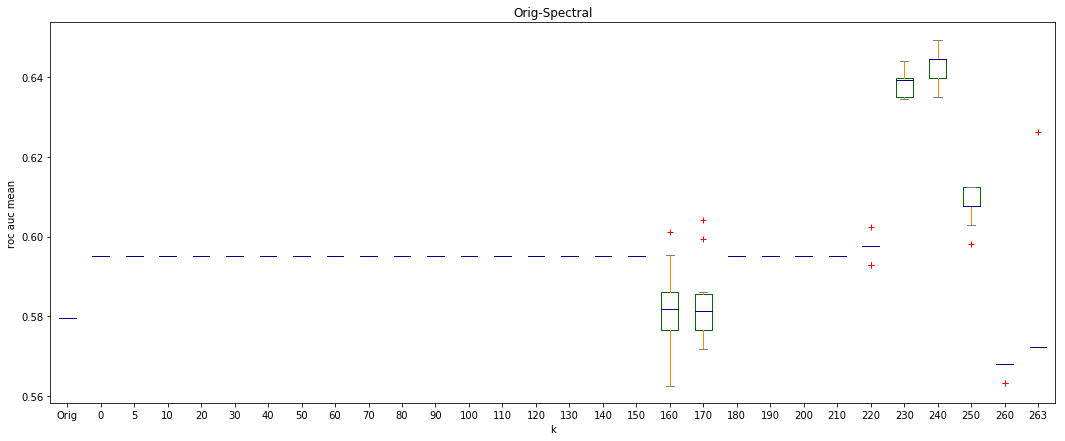

In [9]:
Go_box('Orig-Spectral_ofTheBest', 'Orig-Spectral')

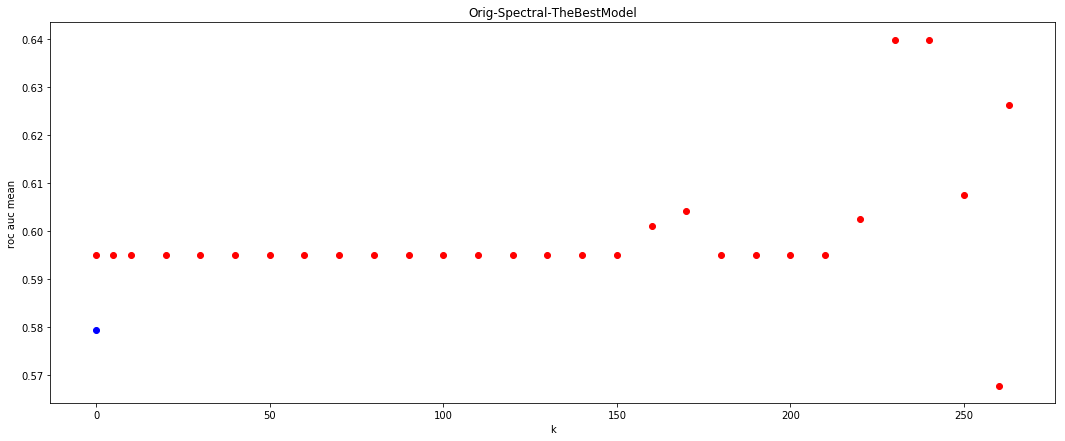

In [10]:
Go_plot('Orig-Spectral_ofTheBest/result_control.csv', 'Orig-Spectral-TheBestModel')

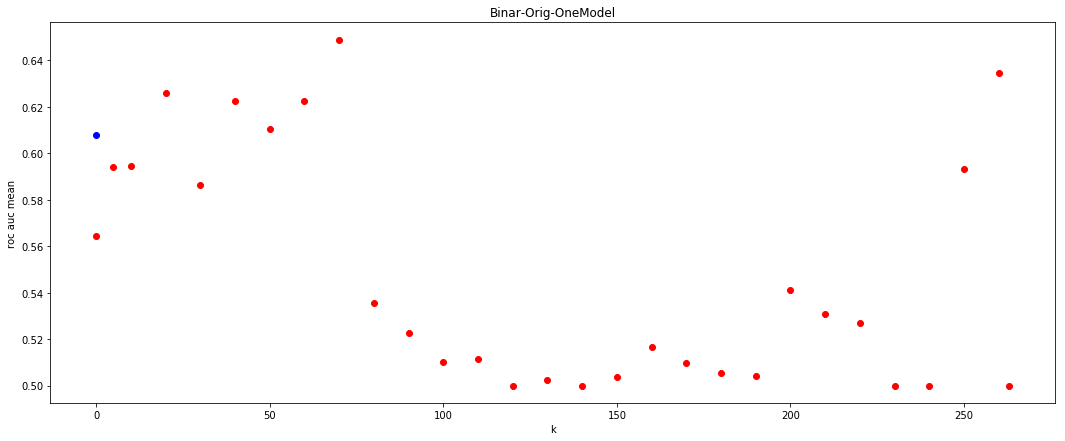

In [11]:
Go_plot('Binar-Orig_ofTheBest/result_control.csv', 'Binar-Orig-OneModel')

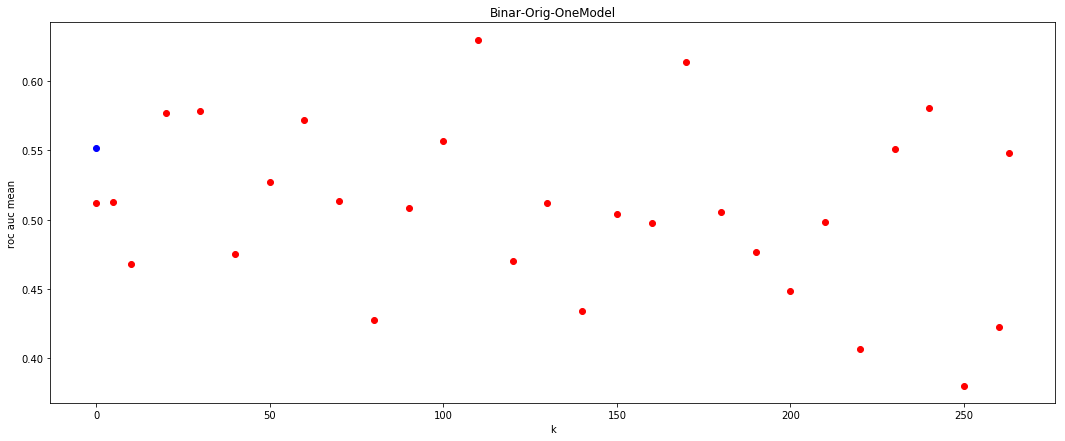

In [12]:
Go_plot('XGB_Binar/results_1.csv', 'Binar-Orig-OneModel')

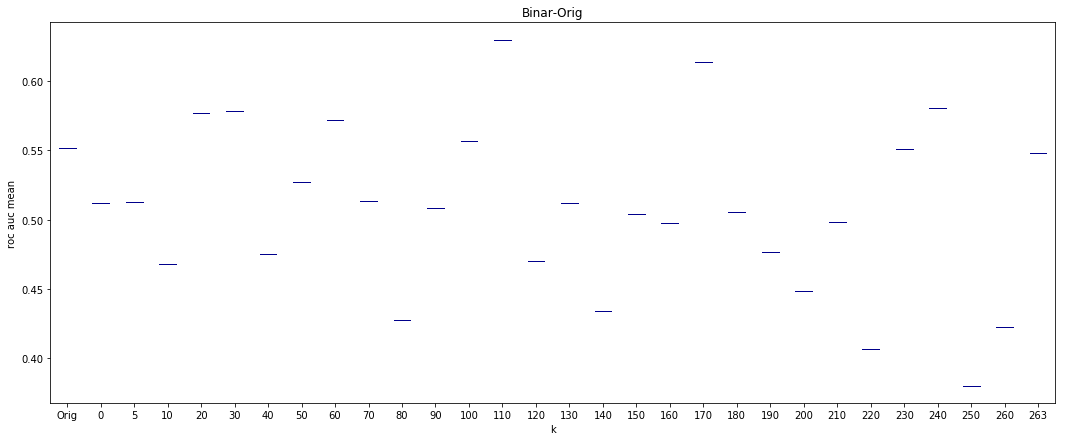

In [16]:
Go_box('XGB_Binar', 'Binar-Orig')

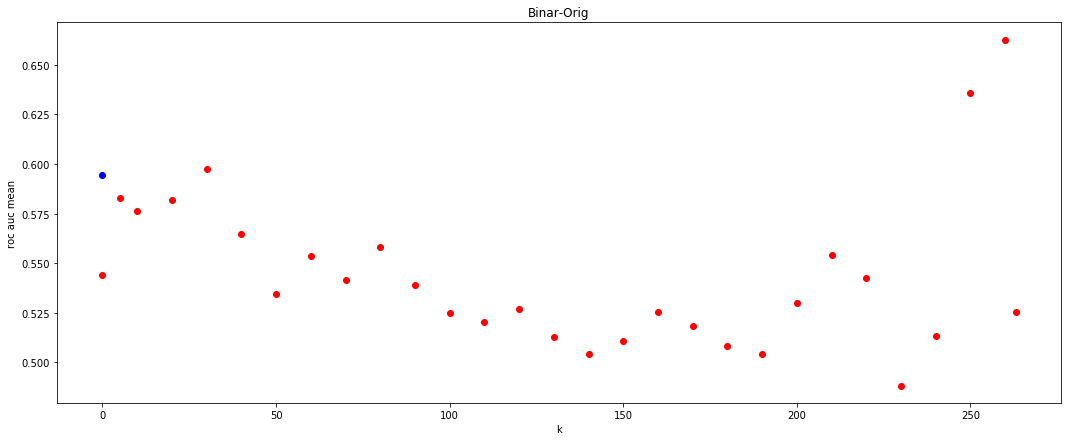

In [8]:
Go_plot('SVC_Binar/results_1.csv', 'Binar-Orig')

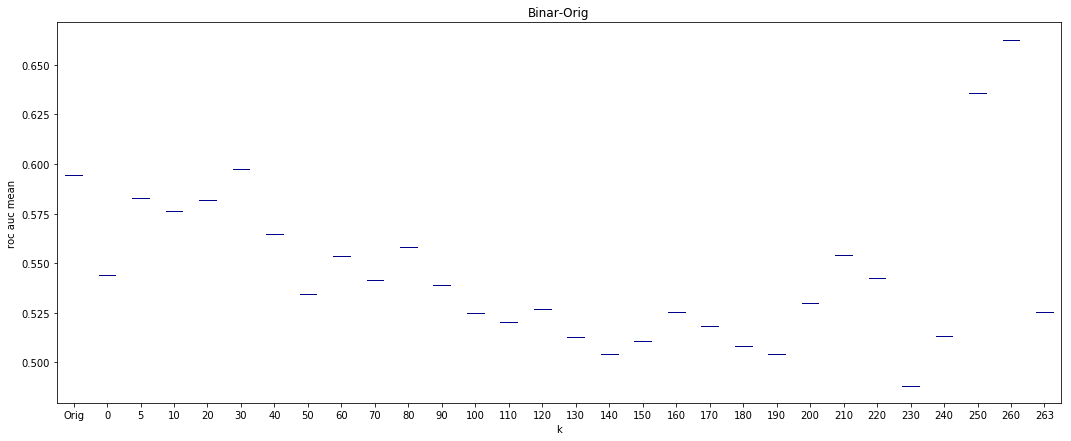

In [10]:
Go_box('SVC_Binar', 'Binar-Orig')

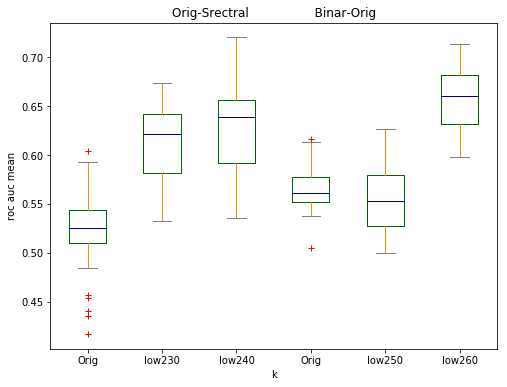

In [25]:
Go_two_box('LR_data_of_boxplot', 'Orig-Srectral', 'Binar-Orig')